# IMPORTING THE LIBRARIES

In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# DATA COLLECTION AND PROCESSING

In [335]:
car_dataset = pd.read_csv('B:/Projects/CarPrice predictor/car data.csv')
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [336]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [337]:
car_dataset.shape

(301, 9)

In [338]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Checking missing values

In [339]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [340]:
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# Encoding the catagorical data

In [341]:
car_dataset.replace({'Fuel_Type':{'Petrol':0 , 'Diesel':1, 'CNG':2}},inplace=True)

car_dataset.replace({'Seller_Type':{'Individual':0 , 'Dealer':1}},inplace=True)

car_dataset.replace({'Transmission':{'Manual':0 , 'Automatic':1}},inplace=True)

C:\Users\supri\AppData\Local\Temp\ipykernel_20072\849061602.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0 , 'Diesel':1, 'CNG':2}},inplace=True)
C:\Users\supri\AppData\Local\Temp\ipykernel_20072\849061602.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Individual':0 , 'Dealer':1}},inplace=True)
C:\Users\supri\AppData\Local\Temp\ipykernel_20072\849061602.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

In [342]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,1,0,0


In [343]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


# Spliting the data and target

In [344]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [345]:
print(X)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            1             0      0
1    2013           9.54       43000  ...            1             0      0
2    2017           9.85        6900  ...            1             0      0
3    2011           4.15        5200  ...            1             0      0
4    2014           6.87       42450  ...            1             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            1             0      0
297  2015           5.90       60000  ...            1             0      0
298  2009          11.00       87934  ...            1             0      0
299  2017          12.50        9000  ...            1             0      0
300  2016           5.90        5464  ...            1             0      0

[301 rows x 7 columns]


In [346]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Spliting test and training data

In [347]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.1, random_state=2)

# Model training

    1.Linear Regression Model

In [348]:
lin_reg_model = LinearRegression()

In [349]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

     Model evaluation

In [350]:
# prediction on training data
training_data_pred = lin_reg_model.predict(X_train)

In [351]:
# R squared error
error_score = metrics.r2_score(Y_train , training_data_pred)
print('R squared error is : ', error_score)

R squared error is :  0.8799451660493709


In [352]:
#Mean absolute Error
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error is : ", mean_absolute_error(Y_train , training_data_pred))

Mean Absolute Error is :  1.216617409391451


      Visualize the actual prices and predicted prices

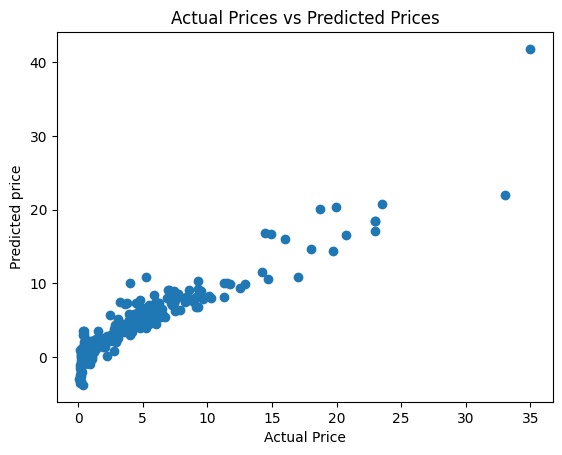

In [353]:
plt.scatter(Y_train , training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [354]:
# prediction on test data
test_data_pred = lin_reg_model.predict(X_test)

In [355]:
# R squared error
error_score = metrics.r2_score(Y_test , test_data_pred)
print('R squared error is : ', error_score)

R squared error is :  0.8365766715026374


In [356]:
#Mean absolute Error
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error is : ", mean_absolute_error(Y_test , test_data_pred))

Mean Absolute Error is :  1.1516382156617009


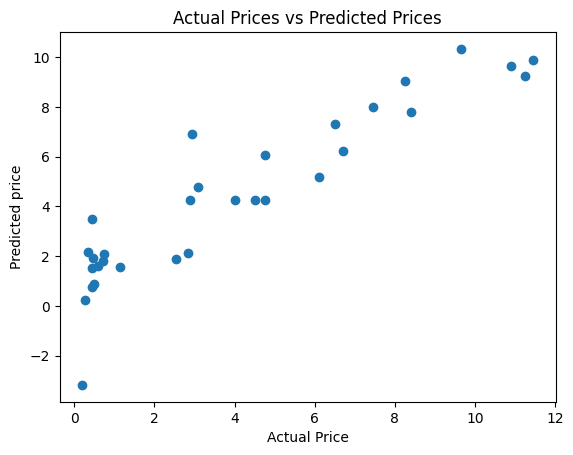

In [357]:
plt.scatter(Y_test ,test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

     2.Lasso regression

In [358]:
las_reg_model = Lasso()

In [359]:
las_reg_model.fit(X_train , Y_train)

Lasso()

    Model evaluation

In [360]:
# prediction on training data
training_data_pred = las_reg_model.predict(X_train)

In [361]:
# R squared error
error_score = metrics.r2_score(Y_train , training_data_pred)
print('R squared error is : ', error_score)

R squared error is :  0.8427856123435794


# VISUALIZE THE ACTUAL AND PREDICTED PRICES

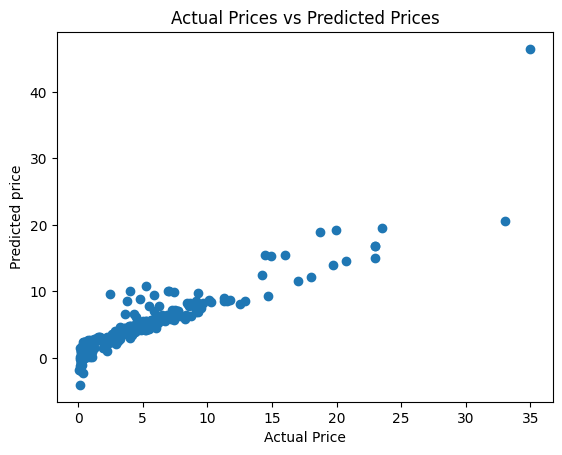

In [362]:
plt.scatter(Y_train ,training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [363]:
# prediction on test data
test_data_pred = las_reg_model.predict(X_test)

In [364]:
# R squared error
error_score = metrics.r2_score(Y_test , test_data_pred)
print('R squared error is : ', error_score)

R squared error is :  0.8709167941173195


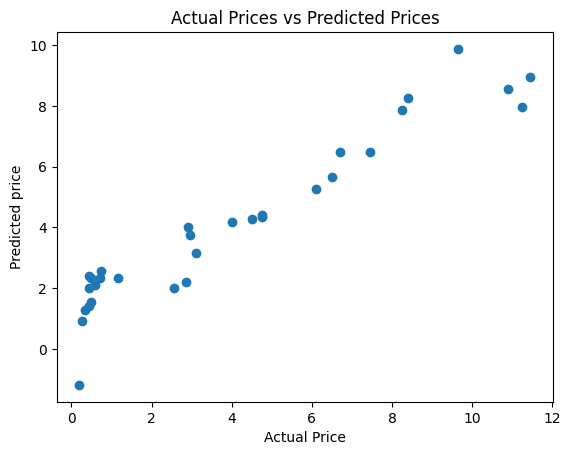

In [365]:
plt.scatter(Y_test ,test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [381]:
input_data = (2010,22.83,80000,0,1,1,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lin_reg_model.predict(input_data_reshaped)
scalar_prediction = prediction.item()
print(f"Price Of The Car In INR(Lakhs) Is: {scalar_prediction:.2f} Lakhs")

Price Of The Car In INR(Lakhs) Is: 10.92 Lakhs


c:\PYTHON 3.10\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
